In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2
import os
import tensorflow as tf
import keras

In [2]:
path=r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\train'

x=[]
y=[]

for i in os.listdir(path):
    print(i)
    for j in os.listdir(os.path.join(path,i)):
        images=cv2.imread(os.path.join(path,i,j))
        images=cv2.resize(images,(100,100))
        x.append(images)
        y.append(i)

NORMAL
PNEUMONIA


In [3]:
x=np.array(x)
y=np.array(y)

In [4]:
x.shape , y.shape

((3714, 100, 100, 3), (3714,))

In [5]:
x=x.astype('float32')
x

array([[[[22., 22., 22.],
         [18., 18., 18.],
         [24., 24., 24.],
         ...,
         [94., 94., 94.],
         [93., 93., 93.],
         [93., 93., 93.]],

        [[19., 19., 19.],
         [20., 20., 20.],
         [14., 14., 14.],
         ...,
         [97., 97., 97.],
         [93., 93., 93.],
         [90., 90., 90.]],

        [[20., 20., 20.],
         [19., 19., 19.],
         [15., 15., 15.],
         ...,
         [94., 94., 94.],
         [91., 91., 91.],
         [88., 88., 88.]],

        ...,

        [[29., 29., 29.],
         [29., 29., 29.],
         [29., 29., 29.],
         ...,
         [21., 21., 21.],
         [23., 23., 23.],
         [24., 24., 24.]],

        [[30., 30., 30.],
         [27., 27., 27.],
         [26., 26., 26.],
         ...,
         [43., 43., 43.],
         [46., 46., 46.],
         [45., 45., 45.]],

        [[38., 38., 38.],
         [36., 36., 36.],
         [37., 37., 37.],
         ...,
         [86., 86., 86.],
        

In [6]:
y=pd.get_dummies(y, dtype='uint8')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_x,test_x, train_y,test_y= train_test_split(x,y,random_state=1,test_size=0.3)

In [9]:
train_x.shape , train_y.shape

((2599, 100, 100, 3), (2599, 2))

In [10]:
test_x.shape, test_y.shape

((1115, 100, 100, 3), (1115, 2))

In [11]:
from tensorflow.keras.applications import VGG16

In [20]:
vgg_conv=VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))
vgg_conv

<Functional name=vgg16, built=True>

In [21]:
for layer in vgg_conv.layers[:-5]:
    layer.trainable=False

In [22]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Convolution2D,Dropout,Dense,Flatten,BatchNormalization,MaxPooling2D

In [23]:
model4=Sequential()

model4.add(vgg_conv)
model4.add(Flatten())

model4.add(Dense(512,'relu'))
model4.add(Dropout(0.3))

model4.add(Dense(256,'relu'))
model4.add(Dropout(0.3))

model4.add(Dense(128,'relu'))
model4.add(Dropout(0.3))

model4.add(Dense(64,'relu'))
model4.add(Dropout(0.3))

model4.add(Dense(2,'softmax'))

In [24]:
from tensorflow.keras.optimizers import RMSprop

In [25]:
model4.compile(loss='categorical_crossentropy',
                     metrics=['accuracy'],
                     optimizer=RMSprop(learning_rate=0.001))

In [26]:
import time

In [27]:
start_time4=time.time()

history4=model4.fit(train_x, train_y, validation_data=(test_x,test_y), epochs=20, batch_size=200, verbose=1)

end_time4=time.time()

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 243s 19s/step - accuracy: 0.5238 - loss: 45.3920 - val_accuracy: 0.6143 - val_loss: 0.6895
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 240s 19s/step - accuracy: 0.6296 - loss: 0.6836 - val_accuracy: 0.6143 - val_loss: 0.6741
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 237s 19s/step - accuracy: 0.6526 - loss: 0.6630 - val_accuracy: 0.6143 - val_loss: 0.6680
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 236s 19s/step - accuracy: 0.6528 - loss: 0.6535 - val_accuracy: 0.6143 - val_loss: 0.6669
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 238s 19s/step - accuracy: 0.6434 - loss: 0.6538 - val_accuracy: 0.6143 - val_loss: 0.6680
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 236s 19s/step - accuracy: 0.6587 - loss: 0.6420 - val_accuracy: 0.6143 - val_loss: 0.6687
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 236s 19s/step - accuracy: 0.6545 - loss: 0.6439 - val_accuracy: 0.6143 - val_loss: 0.6695
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 255s 18s/step - accuracy: 0.6496 - loss: 0.6470 - val_accuracy: 0

# in this VGG16 , i am just  taking the vgg16 model architecture  without dense layers and then adding our own dense layers.

In [34]:
vgg_conv=VGG16(include_top=False, input_shape=(100,100,3))
vgg_conv

<Functional name=vgg16, built=True>

In [38]:
model41=Sequential()

model41.add(vgg_conv)
model41.add(Flatten())

model41.add(Dense(512,'relu'))
model41.add(Dropout(0.3))

model41.add(Dense(256,'relu'))
model41.add(Dropout(0.3))

model41.add(Dense(128,'relu'))
model41.add(Dropout(0.3))

model41.add(Dense(32,'relu'))
model41.add(Dropout(0.3))

model41.add(Dense(2,'softmax'))

In [39]:
model41.compile(loss='categorical_crossentropy',
                     metrics=['accuracy'],
                     optimizer='adam')

In [40]:
model41.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
start_time4=time.time()

history4=model41.fit(train_x, train_y, validation_data=(test_x,test_y), epochs=10, batch_size=50, verbose=1)

end_time4=time.time()

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 816s 15s/step - accuracy: 0.5804 - loss: 3.6489 - val_accuracy: 0.6143 - val_loss: 0.5772
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 786s 15s/step - accuracy: 0.6732 - loss: 0.5768 - val_accuracy: 0.6143 - val_loss: 0.4762
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 805s 15s/step - accuracy: 0.6804 - loss: 0.4732 - val_accuracy: 0.8780 - val_loss: 0.3151
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 788s 15s/step - accuracy: 0.7666 - loss: 0.5031 - val_accuracy: 0.7229 - val_loss: 0.4755
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 792s 15s/step - accuracy: 0.8272 - loss: 0.3721 - val_accuracy: 0.9363 - val_loss: 0.1809
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 720s 14s/step - accuracy: 0.9047 - loss: 0.2531 - val_accuracy: 0.9489 - val_loss: 0.1463
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 676s 13s/step - accuracy: 0.9429 - loss: 0.1611 - val_accuracy: 0.9489 - val_loss: 0.1389
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 659s 13s/step - accuracy: 0.9441 - loss: 0.1690 - val_accuracy: 0.

# Thus, clearly decreasing the batch size and using adam as optimizer has increased the training accuracy from 66% to 90%+ and has also increased the val accuracy from 61% to 90%+.

## note:- here i have not used the weights of IMAGENET dataset(which was used in the previous project)

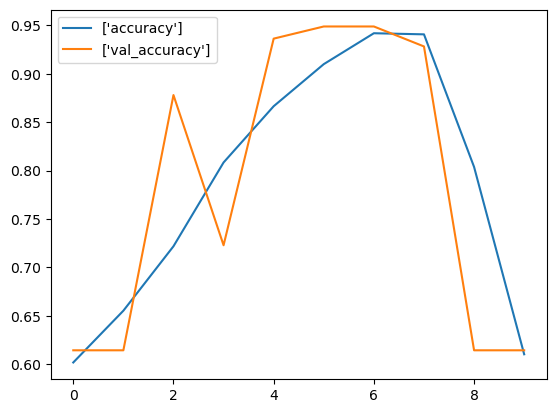

In [44]:
plt.plot(history4.history['accuracy'] , label=['accuracy'])
plt.plot(history4.history['val_accuracy'] , label=['val_accuracy'])
plt.legend()

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
test_datagen = ImageDataGenerator(rescale=1./255)
                                 #rotation_range=0.75,
                                  #zoom_range=0.75,
                                  #horizontal_flip=True,
                                  #fill_mode='nearest')

In [62]:
test_generator = test_datagen.flow_from_directory(
    r'E:\AI\dataset_for_image_classification\chest_x_ray_pneumonia_dataset\chest_xray\test',
    target_size=(100,100),
    batch_size=30,
    class_mode='categorical' )

Found 624 images belonging to 2 classes.


In [63]:
test_loss, test_accuracy = model41.evaluate(test_generator)
print('Test accuracy:', test_accuracy)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6365 - loss: 0.8748
Test accuracy: 0.625


In [65]:
# Predict the classes of the test data
Y_pred = model41.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step


In [66]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
# Compute confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Confusion Matrix
[[  0 234]
 [  0 390]]


In [68]:
print('Classification Report')
target_names = ['Class 0', 'Class 1']  # Change this according to your class names
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       234
     Class 1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
